In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('../ames') # path the the directory
import config
from data_prep import clean, add_features, dummify

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
housing = clean(config.HOUSING_CSV)
housing = add_features(housing)

In [5]:
X = housing[config.CHOSEN_VARIABLES]
dummy_df = dummify(housing, config.VARS_TO_DUMMIFY, drop_first=True)
X = pd.concat([X,dummy_df], axis=1)
y = np.log(housing['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
lasso = Lasso()

In [12]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-10,0.003,200)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True, max_iter=10000)  
    lasso.fit(X, y)
    train_R2.append(lasso.score(X_train, y_train))
    test_R2.append(lasso.score(X_test, y_test))

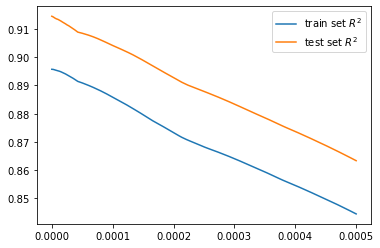

In [14]:
from matplotlib import pyplot as plt
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend()

In [15]:
diff = np.abs(np.array(train_R2)-np.array(test_R2))
best_alpha = alphaRange[diff==min(diff)][0]
best_alpha

4.271365929648241e-05

In [10]:
lasso.set_params(alpha=0.0003, normalize=True)
lasso.fit(X_train, y_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=X.columns)
print('The slopes are \n %s' %(lassoCoef))

The intercept is 10.7244
The slopes are 
 LotFrontage        0.000000
UnusedLotSize      0.000002
HouseAge          -0.002257
HouseAgeSq        -0.000000
OverallQual        0.116727
OverallCond        0.028299
TotalLivingArea    0.000187
Toilets            0.009910
Showers            0.000000
UpDownRatio        0.000000
GarageArea         0.000220
HasPool            0.000000
Nbhd_Blueste      -0.000000
Nbhd_BrDale       -0.058522
Nbhd_BrkSide       0.000000
Nbhd_ClearCr       0.000000
Nbhd_CollgCr       0.000000
Nbhd_Crawfor       0.083540
Nbhd_Edwards      -0.000000
Nbhd_Gilbert       0.000000
Nbhd_Greens       -0.000000
Nbhd_GrnHill       0.000000
Nbhd_IDOTRR       -0.013808
Nbhd_Landmrk       0.000000
Nbhd_MeadowV      -0.047722
Nbhd_Mitchel      -0.000000
Nbhd_NAmes        -0.000000
Nbhd_NPkVill      -0.000000
Nbhd_NWAmes       -0.000000
Nbhd_NoRidge       0.000536
Nbhd_NridgHt       0.021982
Nbhd_OldTown      -0.000000
Nbhd_SWISU        -0.000000
Nbhd_Sawyer       -0.000000
Nbhd_S

In [11]:
sortedCoefs = lassoCoef.sort_values(ascending=False, key=np.abs)
sortedCoefs[np.abs(sortedCoefs)>0].index

Index(['OverallQual', 'Nbhd_Crawfor', 'BT_Twnhs', 'Nbhd_BrDale',
       'Nbhd_MeadowV', 'OverallCond', 'Nbhd_NridgHt', 'BT_Duplex',
       'Nbhd_IDOTRR', 'Toilets', 'SC_Partial', 'HouseAge', 'Nbhd_NoRidge',
       'GarageArea', 'TotalLivingArea', 'UnusedLotSize'],
      dtype='object')